In [169]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm,chisquare
import sys

In [170]:
popt0_34=1/6.90512457e-09
popt1_34=-1.07549696e-11
popt0_12=1/6.32570033e-09 
popt1_12=-7.72742902e-11

In [171]:
t1_1,t2_1,t3_1,t4_1,a1_1,a2_1,a3_1,a4_1 = np.loadtxt('Position_1.txt',unpack=True)

delta_t_12_1 = (t2_1-t1_1)*1e-7
delta_t_34_1 = (t4_1-t3_1)*1e-7

t1_2,t2_2,t3_2,t4_2,a1_2,a2_2,a3_2,a4_2 = np.loadtxt('Position_2.txt',unpack=True)

delta_t_12_2=(t2_2-t1_2)*1e-7
delta_t_34_2=(t4_2-t3_2)*1e-7


t1_3,t2_3,t3_3,t4_3,a1_3,a2_3,a3_3,a4_3 = np.loadtxt('Position_3.txt',unpack=True)

delta_t_12_3=(t2_3-t1_3)*1e-7
delta_t_34_3=(t4_3-t3_3)*1e-7

In [172]:
x12_1=(popt0_12/2)*(delta_t_12_1-popt1_12)+22
x34_1=(popt0_34/2)*(delta_t_34_1-popt1_34)+22

np.set_printoptions(threshold=sys.maxsize)

#print(x12_1)
print(x34_1)

[ 1.85250993e+01  2.02484570e+01  3.40063551e+01  2.72939490e+01
  4.21688526e+00  9.71280349e+00  2.10739309e+01  3.00382876e+01
  2.50637213e+01  4.52100722e+00  4.84159431e+01  1.85250993e+01
  7.30879183e+00  1.52087217e+01  4.04580852e+01  2.85394009e+01
  3.30722662e+01  3.37692938e+00  3.50562999e+01  3.21816233e+01
  6.75123491e+00  1.22833581e+01  2.85611238e+01  4.09649551e+01
  3.20150804e+01  1.66786445e+01  3.73082506e+01  1.67727775e+01
  2.74677330e+01  1.96329721e+01  2.58529902e+01  2.77592646e+00
  2.78732289e+01  1.87278472e+01  1.72072374e+01  6.67882492e+00
  1.26671311e+01  2.14721858e+01  1.92129942e+01  1.75330824e+01
  9.07748725e-01  3.73951426e+01  1.51435527e+01  1.01255404e+01
  2.67798381e+01  1.28264331e+01  3.77716746e+01  1.61572926e+01
  1.11827263e+01  1.29640120e+01  3.03424096e+01  1.85902682e+01
  3.48607930e+01  2.07046399e+01  1.87712932e+01  2.19283688e+01
  4.36658477e+01  2.22397317e+01  3.25436733e+01  2.40644635e+01
  1.61862566e+01  2.95024

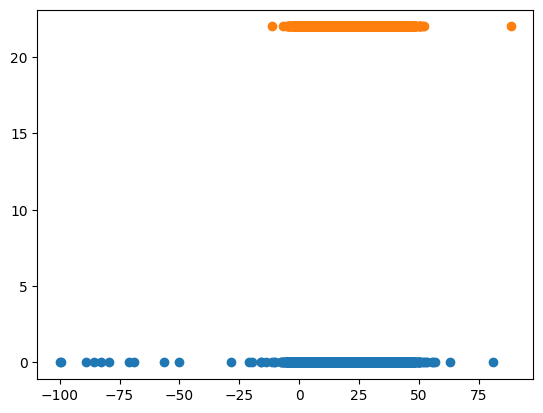

In [173]:

mask = (x12_1 >= -100) & (x12_1 <= 100) & (x34_1 >= -100) & (x34_1 <= 100)
x1_filtered = x12_1[mask]
x2_filtered = x34_1[mask]



zero=np.zeros_like(x1_filtered)

zero1=np.zeros_like(x2_filtered)
plt.scatter(x1_filtered,zero)
plt.scatter(x2_filtered,zero1+22)

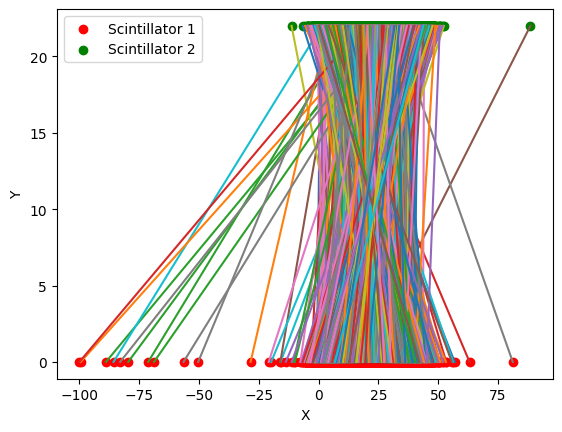

In [174]:
import numpy as np
import matplotlib.pyplot as plt

x1 = x1_filtered # X positions of the first scintillator
x2 = x2_filtered # X positions of the second scintillator

# Calculate the midpoint between the two scintillators
midpoint = (x1 + x2) / 2

# Calculate the slope of the line connecting the two scintillators
slope = (x2 - x1)

# Calculate the y-intercept of the line connecting the two scintillators
intercept = np.zeros_like(midpoint)  
# Distance between the scintillators
distance = 22.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r', label='Scintillator 1')
plt.scatter(x2, y_values + distance, c='g', label='Scintillator 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()


In [175]:
from shapely.geometry import LineString
from shapely import get_x

y=np.linspace(1,20,200)
distry=np.zeros((len(x2_filtered),len(y)))
print(np.shape(distry))
for j in range(len(y)):
    for i in range(len(x2_filtered)):
       line1 = LineString([(x1_filtered[i],0),(x2_filtered[i],22)])
       line2 = LineString([(0,y[j]),(50,y[j])])
       x=get_x((line1.intersection(line2)))
       distry[i,j]=x
      



(4851, 200)


In [176]:
print(np.shape(distry))


(4851, 200)


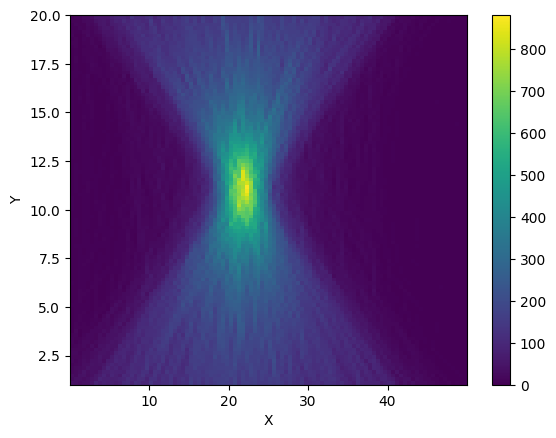

Estimated Source Coordinates: (22.246009045876733, 11.165)


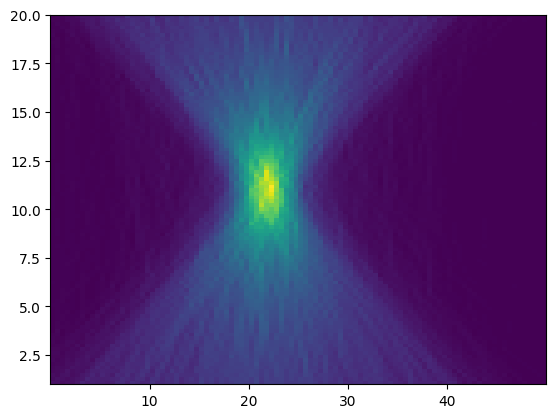

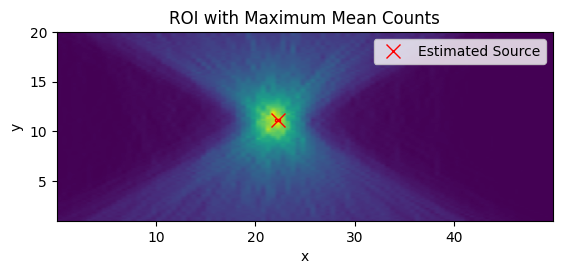

In [177]:
y = np.linspace(1,20,distry.shape[1])

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=100, cmap='viridis')

plt.colorbar()

plt.xlabel('X')
plt.ylabel('Y')

plt.show()


# Step 1: Define the number of bins and spatial resolution
num_bins = 100
spatial_resolution = 1 # Assuming unit spatial resolution for now

# Step 2: Create 2D histogram using plt.hist2d
histogram, xedges, yedges, _ = plt.hist2d(x_filtered1, y_filtered1, bins=num_bins, cmap='viridis')

# Step 3: Calculate the mean counts for each bin
bin_counts = histogram.flatten()
bin_indices = np.arange(len(bin_counts))
mean_counts = bin_counts / np.sum(bin_counts)

# Step 4: Reshape the mean counts array to match the histogram shape
mean_counts = mean_counts.reshape(histogram.shape)

# Step 5: Define the ROI bins
x_min = np.min(x_filtered1)
x_max = np.max(x_filtered1)
y_min = np.min(y_filtered1)
y_max = np.max(y_filtered1)
roi_num_bins = 100  # Number of bins for the ROI
roi_xbins = np.linspace(x_min, x_max, roi_num_bins + 1)
roi_ybins = np.linspace(y_min, y_max, roi_num_bins + 1)

# Step 6: Calculate the histogram for each ROI
roi_histogram, _, _ = np.histogram2d(x_filtered1, y_filtered1, bins=[roi_xbins, roi_ybins])

# Step 7: Calculate the mean counts for each ROI
roi_counts = np.sum(roi_histogram)
mean_counts_roi = roi_histogram / roi_counts

# Step 8: Find the ROI with the maximum mean count
max_mean_counts_index = np.unravel_index(np.argmax(mean_counts_roi), mean_counts_roi.shape)

# Step 9: Convert bin indices to source coordinates within the ROI
i, j = max_mean_counts_index
x_coord = (roi_xbins[i] + roi_xbins[i+1]) / 2
y_coord = (roi_ybins[j] + roi_ybins[j+1]) / 2

# Print the found coordinates
print("Estimated Source Coordinates: ({}, {})".format(x_coord, y_coord))

# Optional: Visualize the ROI with the maximum mean counts and the bin with the maximum count highlighted
plt.figure()
plt.imshow(mean_counts_roi.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')

# Highlight the bin with the maximum count
rect = plt.Rectangle((roi_xbins[i], roi_ybins[j]), np.diff(roi_xbins)[0], np.diff(roi_ybins)[0],
                     linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

# Plot the estimated source coordinates
plt.plot(x_coord, y_coord, 'rx', markersize=10, label='Estimated Source')

plt.xlabel('x')
plt.ylabel('y')
plt.title('ROI with Maximum Mean Counts')
plt.legend()
plt.show()

POSIZIONE 2

In [195]:
x12_2=(popt0_12/2)*(delta_t_12_2-popt1_12)+22
x34_2=(popt0_34/2)*(delta_t_34_2-popt1_34)+22


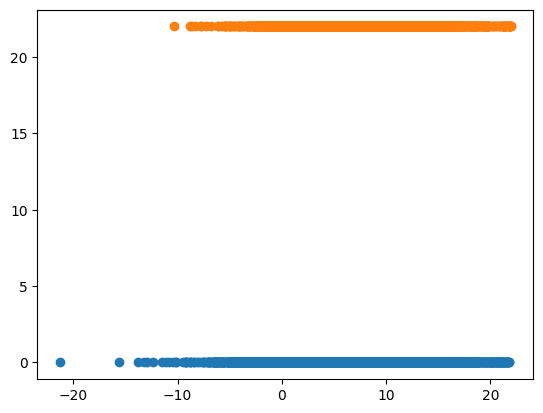

In [196]:
mask = (x12_2 >= -22) & (x12_2 <= 22) & (x34_2 >= -22) & (x34_2 <= 22)
x1_filtered = x12_2[mask]
x2_filtered = x34_2[mask]



zero=np.zeros_like(x1_filtered)

zero1=np.zeros_like(x2_filtered)
plt.scatter(x1_filtered,zero)
plt.scatter(x2_filtered,zero1+22)

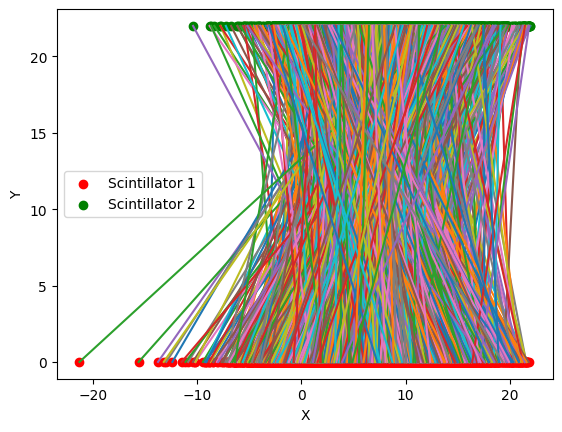

In [197]:
x1 = x1_filtered
x2 = x2_filtered 

midpoint = (x1 + x2) / 2

slope = (x2 - x1)

intercept = np.zeros_like(midpoint)  
distance = 22.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r', label='Scintillator 1')
plt.scatter(x2, y_values + distance, c='g', label='Scintillator 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()


In [198]:
y=np.linspace(1,20,200)
distry=np.zeros((len(x2_filtered),len(y)))
print(np.shape(distry))
for j in range(len(y)):
    for i in range(len(x2_filtered)):
       line1 = LineString([(x1_filtered[i],0),(x2_filtered[i],22)])
       line2 = LineString([(0,y[j]),(50,y[j])])
       x=get_x((line1.intersection(line2)))
       distry[i,j]=x

(4413, 200)


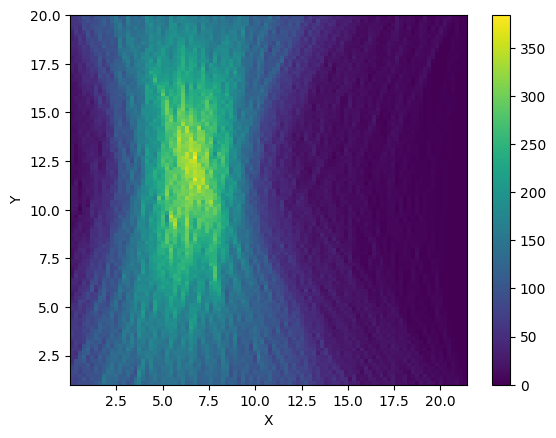

Estimated Source Coordinates: (6.641701316398671, 12.59)


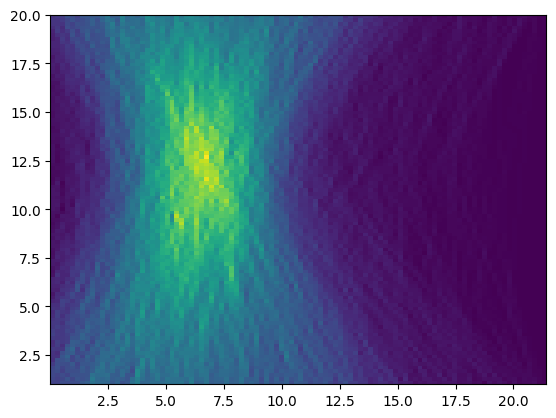

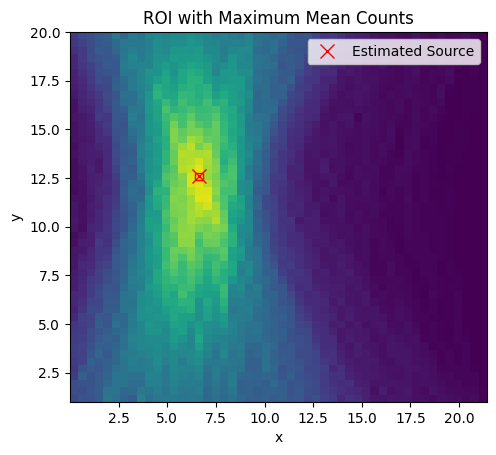

In [201]:
y=np.linspace(1,20,200)

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

plt.hist2d(x_filtered1, y_filtered1, bins=100, cmap='viridis')

plt.colorbar()

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

num_bins = 100
spatial_resolution = 10  

histogram, xedges, yedges, _ = plt.hist2d(x_filtered1, y_filtered1, bins=num_bins, cmap='viridis')

bin_counts = histogram.flatten()
bin_indices = np.arange(len(bin_counts))
mean_counts = bin_counts / np.sum(bin_counts)

mean_counts = mean_counts.reshape(histogram.shape)

x_min = np.min(x_filtered1)
x_max = np.max(x_filtered1)
y_min = np.min(y_filtered1)
y_max = np.max(y_filtered1)
roi_num_bins = 50  # Number of bins for the ROI
roi_xbins = np.linspace(x_min, x_max, roi_num_bins + 1)
roi_ybins = np.linspace(y_min, y_max, roi_num_bins + 1)

roi_histogram, _, _ = np.histogram2d(x_filtered1, y_filtered1, bins=[roi_xbins, roi_ybins])

roi_counts = np.sum(roi_histogram)
mean_counts_roi = roi_histogram / roi_counts

max_mean_counts_index = np.unravel_index(np.argmax(mean_counts_roi), mean_counts_roi.shape)

i, j = max_mean_counts_index
x_coord = (roi_xbins[i] + roi_xbins[i+1]) / 2
y_coord = (roi_ybins[j] + roi_ybins[j+1]) / 2

print("Estimated Source Coordinates: ({}, {})".format(x_coord, y_coord))

plt.figure()
plt.imshow(mean_counts_roi.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')

rect = plt.Rectangle((roi_xbins[i], roi_ybins[j]), np.diff(roi_xbins)[0], np.diff(roi_ybins)[0],
                     linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

plt.plot(x_coord, y_coord, 'rx', markersize=10, label='Estimated Source')

plt.xlabel('x')
plt.ylabel('y')
plt.title('ROI with Maximum Mean Counts')
plt.legend()
plt.show()

POSIZIONE 3

In [202]:
x12_3=(popt0_12/2)*(delta_t_12_3-popt1_12)+22
x34_3=(popt0_34/2)*(delta_t_34_3-popt1_34)+22

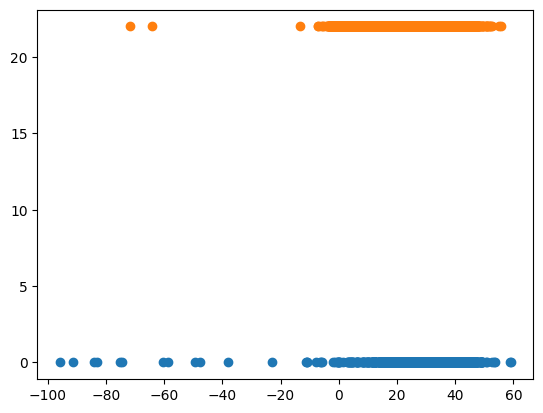

In [203]:
mask = (x12_3 >= -100) & (x12_3 <= 100) & (x34_3 >= -100) & (x34_3 <= 100)
x1_filtered = x12_3[mask]
x2_filtered = x34_3[mask]



zero=np.zeros_like(x1_filtered)

zero1=np.zeros_like(x2_filtered)
plt.scatter(x1_filtered,zero)
plt.scatter(x2_filtered,zero1+22)

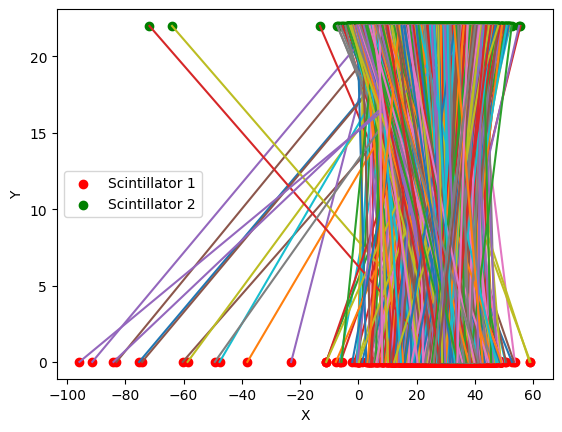

In [204]:
from shapely.geometry import LineString
from shapely import get_x
x1 = x1_filtered
x2 = x2_filtered 

midpoint = (x1 + x2) / 2

slope = (x2 - x1)

intercept = np.zeros_like(midpoint)  
distance = 22.0  # cm

y_values = np.zeros_like(x1)  



for i in range(len(x1)):
    x_values = np.array([x1[i], x2[i]])
    plt.plot(x_values, y_values[i] + np.array([0, distance]))

plt.scatter(x1, y_values, c='r', label='Scintillator 1')
plt.scatter(x2, y_values + distance, c='g', label='Scintillator 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

In [205]:
y=np.linspace(1,20,200)
distry=np.zeros((len(x2_filtered),len(y)))
print(np.shape(distry))
for j in range(len(y)):
    for i in range(len(x2_filtered)):
       line1 = LineString([(x1_filtered[i],0),(x2_filtered[i],22)])
       line2 = LineString([(0,y[j]),(50,y[j])])
       x=get_x((line1.intersection(line2)))
       distry[i,j]=x

(4888, 200)


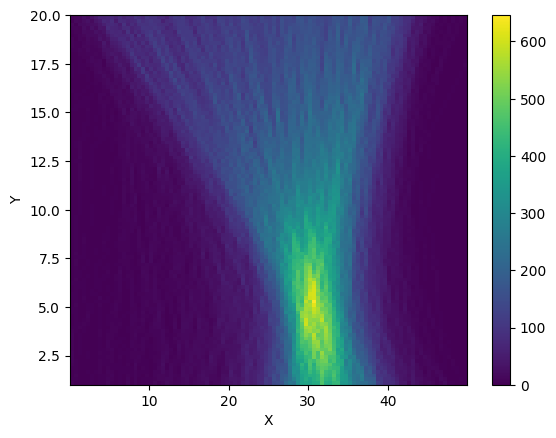

Estimated Source Coordinates: (30.74061029984285, 5.275)


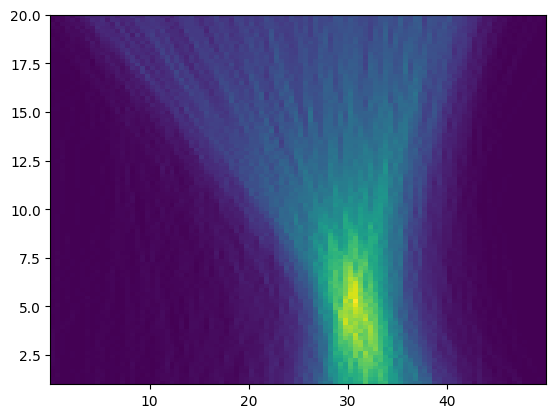

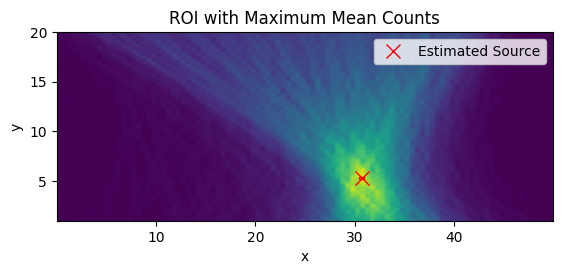

In [206]:
y=np.linspace(1,20,200)

x_flattened = distry.flatten()
y_flattened = np.tile(y, distry.shape[0])

mask = ~np.isnan(x_flattened)
x_filtered1 = x_flattened[mask]
y_filtered1 = y_flattened[mask]

a=plt.hist2d(x_filtered1, y_filtered1, bins=100, cmap='viridis')


plt.colorbar()

plt.xlabel('X')
plt.ylabel('Y')

plt.show()


num_bins = 100
spatial_resolution = 10  

histogram, xedges, yedges, _ = plt.hist2d(x_filtered1, y_filtered1, bins=num_bins, cmap='viridis')

bin_counts = histogram.flatten()
bin_indices = np.arange(len(bin_counts))
mean_counts = bin_counts / np.sum(bin_counts)

mean_counts = mean_counts.reshape(histogram.shape)

x_min = np.min(x_filtered1)
x_max = np.max(x_filtered1)
y_min = np.min(y_filtered1)
y_max = np.max(y_filtered1)
roi_num_bins = 100  
roi_xbins = np.linspace(x_min, x_max, roi_num_bins + 1)
roi_ybins = np.linspace(y_min, y_max, roi_num_bins + 1)

roi_histogram, _, _ = np.histogram2d(x_filtered1, y_filtered1, bins=[roi_xbins, roi_ybins])

roi_counts = np.sum(roi_histogram)
mean_counts_roi = roi_histogram / roi_counts

max_mean_counts_index = np.unravel_index(np.argmax(mean_counts_roi), mean_counts_roi.shape)

i, j = max_mean_counts_index
x_coord = (roi_xbins[i] + roi_xbins[i+1]) / 2
y_coord = (roi_ybins[j] + roi_ybins[j+1]) / 2

print("Estimated Source Coordinates: ({}, {})".format(x_coord, y_coord))

plt.figure()
plt.imshow(mean_counts_roi.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')

rect = plt.Rectangle((roi_xbins[i], roi_ybins[j]), np.diff(roi_xbins)[0], np.diff(roi_ybins)[0],
                     linewidth=1, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

plt.plot(x_coord, y_coord, 'rx', markersize=10, label='Estimated Source')

plt.xlabel('x')
plt.ylabel('y')
plt.title('ROI with Maximum Mean Counts')
plt.legend()
plt.show()


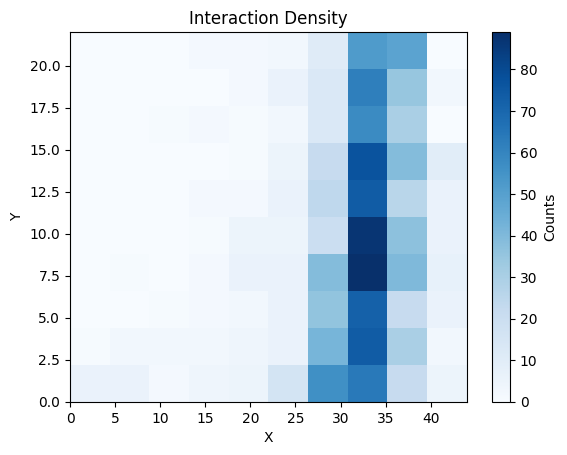

In [189]:
# Calculate the y-positions based on the intersection of the lines
intersection_x = (x1_filtered + x2_filtered) / 2
slope = (x2_filtered - x1_filtered) / 22  # Distance between the scintillators in cm
intersection_y = slope * intersection_x

# Create a 2D histogram with specified range
plt.hist2d(intersection_x, intersection_y, bins=10, range=[[-0, 44], [0, 22]], cmap='Blues')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interaction Density')

# Add colorbar
cb = plt.colorbar()
cb.set_label('Counts')

plt.show()